# ML1: Hierarchical Clustering

By: Gavin

## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [32]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

## Clean Dataset

In [33]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
0,1,Male,19,15000,39,Healthcare,1,4,1,5
1,2,Male,21,35000,81,Engineer,3,3,1,2
2,3,Female,20,86000,6,Engineer,1,1,0,2
3,4,Female,23,59000,77,Lawyer,0,2,0,7
4,5,Female,31,38000,40,Entertainment,2,6,0,3


## Using the dendrogram to find the optimal number of clusters

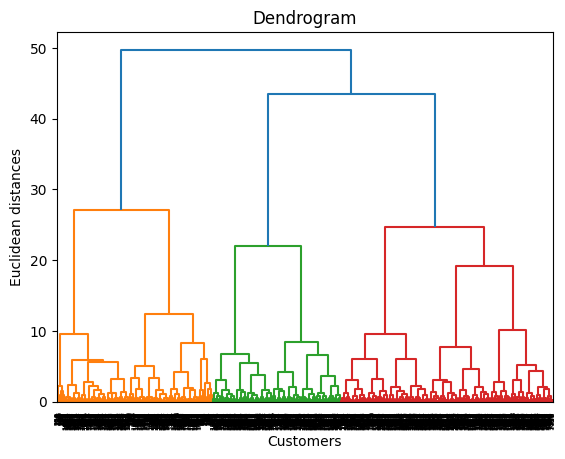

In [34]:
scaler=StandardScaler()

# Extract the relevant columns for clustering
X = df[['Annual Income ($)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a dendrogram using Ward's method
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Add labels and title to the dendrogram
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

# Show the plot
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [35]:
# Train the hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

c:\Users\Gavin\Desktop\project2-data-analytics\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

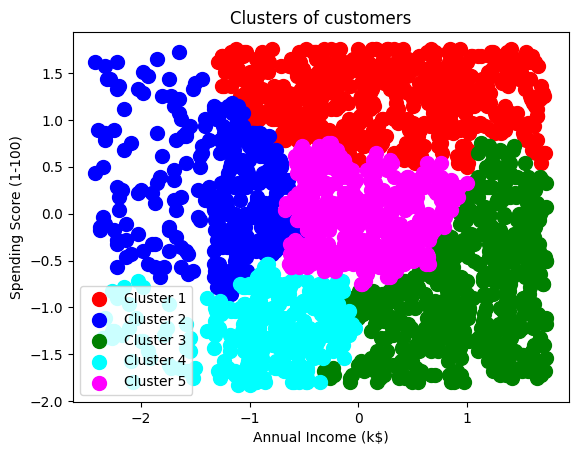

In [36]:
# Visualize the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()